In [1]:
import numpy as np;
import scipy as sp;
import matplotlib.pyplot as plt
from scipy import signal

In [5]:
#Zadatak 1: 
#a) Nacrtati Bodeov dijagram funkcije prenosa W(s)=1/(s/0.5+1)(s+1)(s/2+1) 
#b) Oderediti brzinsku konstantu, presecnu ucestanost pojacanja, presecnu ucestanost faze i faznu i amplitudsku marginu
#c) Dizajnirati integralni kompenzator koji obezbedjuje konstantu pojacanja > 9, i faznu marginu >40 stepeni
#d) Nacrtati finalni Bodeov dijagram funkcije prenosa D(s)W(s) i proveriti da li su ispunjene specifikacije
#e) Nacrtati odskocne i nagibne odzive kompenzovanog i nekompenzovanog sistema sa zatvorenom povratnom spregom

In [2]:
W=signal.lti([], [-0.5, -1, -2], 1)

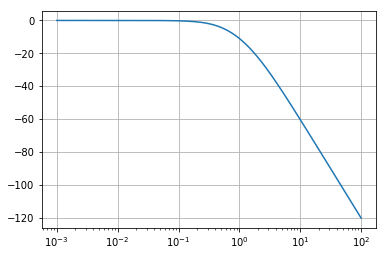

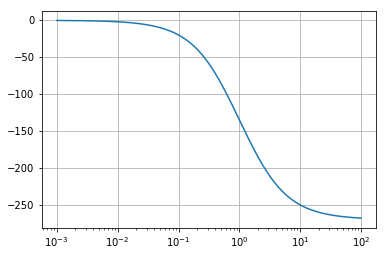

In [3]:
# a)
w_log=np.logspace(-3,2,num=100000)
w, mag, phase = signal.bode(W,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [4]:
# b) konstanta polozaja
Kp=1

In [5]:
# presecna ucestanost pojacanja je nula

In [6]:
#fazna margina je 180 stepeni

In [7]:
# presecna ucestanost faze
w_pi=w[phase[:]>=-180][-1]
print("Presecna ucestanost faze:",round(w_pi,2))

Presecna ucestanost faze: 1.87


In [8]:
# amplitudska margina
d=1/10**((mag[phase[:]>=-180][-1])/20)
print("Amplitudska margina:",round(d,2))

Amplitudska margina: 11.25


In [9]:
#c) # Trazimo kontroler C(s)=K*alpha(s/z+1)/(s/p+1), p=z/alpha 
# I nacin : Trazimo pojacanje K za koje je fazna margina za oko 10 stepeni veca od trazene:
mag_PM=mag[phase[:]>=-180+50][-1]
K=1/(10**(mag_PM/20))
print("Pojacanje za koje je PM 50 je",round(K,1))

Pojacanje za koje je PM 50 je 3.2


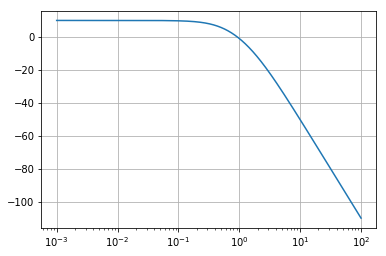

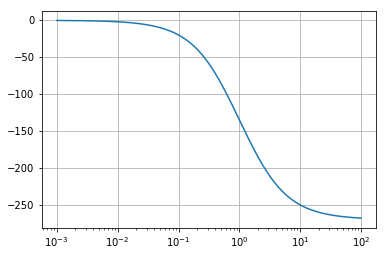

In [10]:
# Bodeov dijagram za KW(s):
W1=signal.lti([], [-0.5, -1, -2], K)
w, mag, phase = signal.bode(W1,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()

In [11]:
# nova presecna ucestanost pojacanja
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))

Presecna ucestanost pojacanja: 0.94


In [12]:
# nova fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

Fazna margina: 50.0


In [13]:
# Da bismo dobili trazenu brzinsku konstantu 9, alpha treba da bude 9/K
alpha=10/K
alpha

3.1202110470694802

In [14]:
# probamo nulu z npr. 5 puta manju od w1, znaci pol je p=z/alpha
z=w1/5
p=z/alpha
z,p

(0.18700779261318606, 0.059934340912235679)

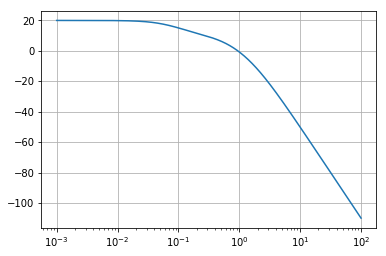

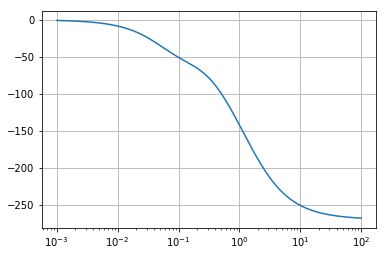

Presecna ucestanost pojacanja: 0.95
Fazna margina: 41.56


In [15]:
# Proveravamo sistem za C(s)=K*alpha*(s/z+1)/(s/p+1)=K(s+z)/(s+p)
W2=signal.lti([-z], [-0.5, -1, -2, -p], K)
w, mag, phase = signal.bode(W2,w=w_log)
plt.figure()
plt.grid()
plt.semilogx(w, mag)    # Bode amplitudska karakteristika
plt.figure()
plt.grid()
plt.semilogx(w, phase)  # Bode fazna karakteristika
plt.show()
# presecna ucestanost pojacanja za K=10
w1=w[mag[:]>=0][-1]
print("Presecna ucestanost pojacanja:",round(w1,2))
#fazna margina
PM=180+phase[mag[:]>=0][-1]
print("Fazna margina:",round(PM,2))

In [16]:
#d) Ispunjeni su kriterijumi za gore izabran kompenzator

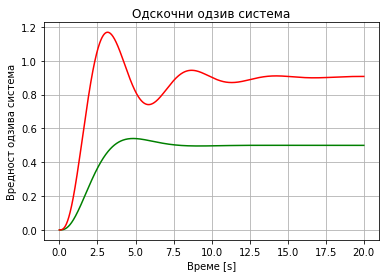

In [17]:
#d) Odredjujemo funkciju spregnutog prenosa G(s)=W(s)/1+W(s) , W(s)=K(s+z)/(s+0.5)(s+1)(s+2)(s+p)

brojilac=[K, K*z]
imenilac1=sp.convolve(sp.convolve(sp.convolve([1,0.5],[1,1]),[1,2]),[1,p])
imenilac=imenilac1+[0, 0, 0, K, K*z]
G2=signal.lti(brojilac,imenilac)

imenilac_orig=sp.convolve(sp.convolve([1,0.5],[1,1]),[1,2])

G=signal.lti([1],imenilac_orig+[0, 0, 0, 1])


t=np.linspace(0,20,1000)

tt,y1=G.step(T=t)
tt,y2=G2.step(T=t)
plt.plot(tt,y1,'g',tt,y2,'r')
plt.title("Одскочни одзив система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()

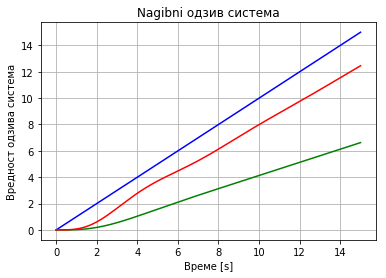

In [18]:
# Odzivi na jedinicne nagibne pobude
t=np.linspace(0,15,1000)
tt,y1,x1=signal.lsim(G,t,t)
tt,y2,x2=signal.lsim(G2,t,t)
plt.plot(tt,tt,'b',tt,y1,'g',tt,y2,'r')
plt.title("Nagibni одзив система")
plt.ylabel("Вредност одзива система")
plt.xlabel("Време [s]")
plt.grid()
plt.show()